In [1]:
from azureml import Workspace

ws = Workspace()
ds = ws.datasets['Energy Efficiency Regression data']
frame = ds.to_dataframe()

In [2]:
% pylab inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [4]:
import seaborn as sns

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
num_cols = ["Relative Compactness","Surface Area","Wall Area","Roof Area","Overall Height","Orientation","Glazing Area","Glazing Area Distribution","Heating Load","Cooling Load"]


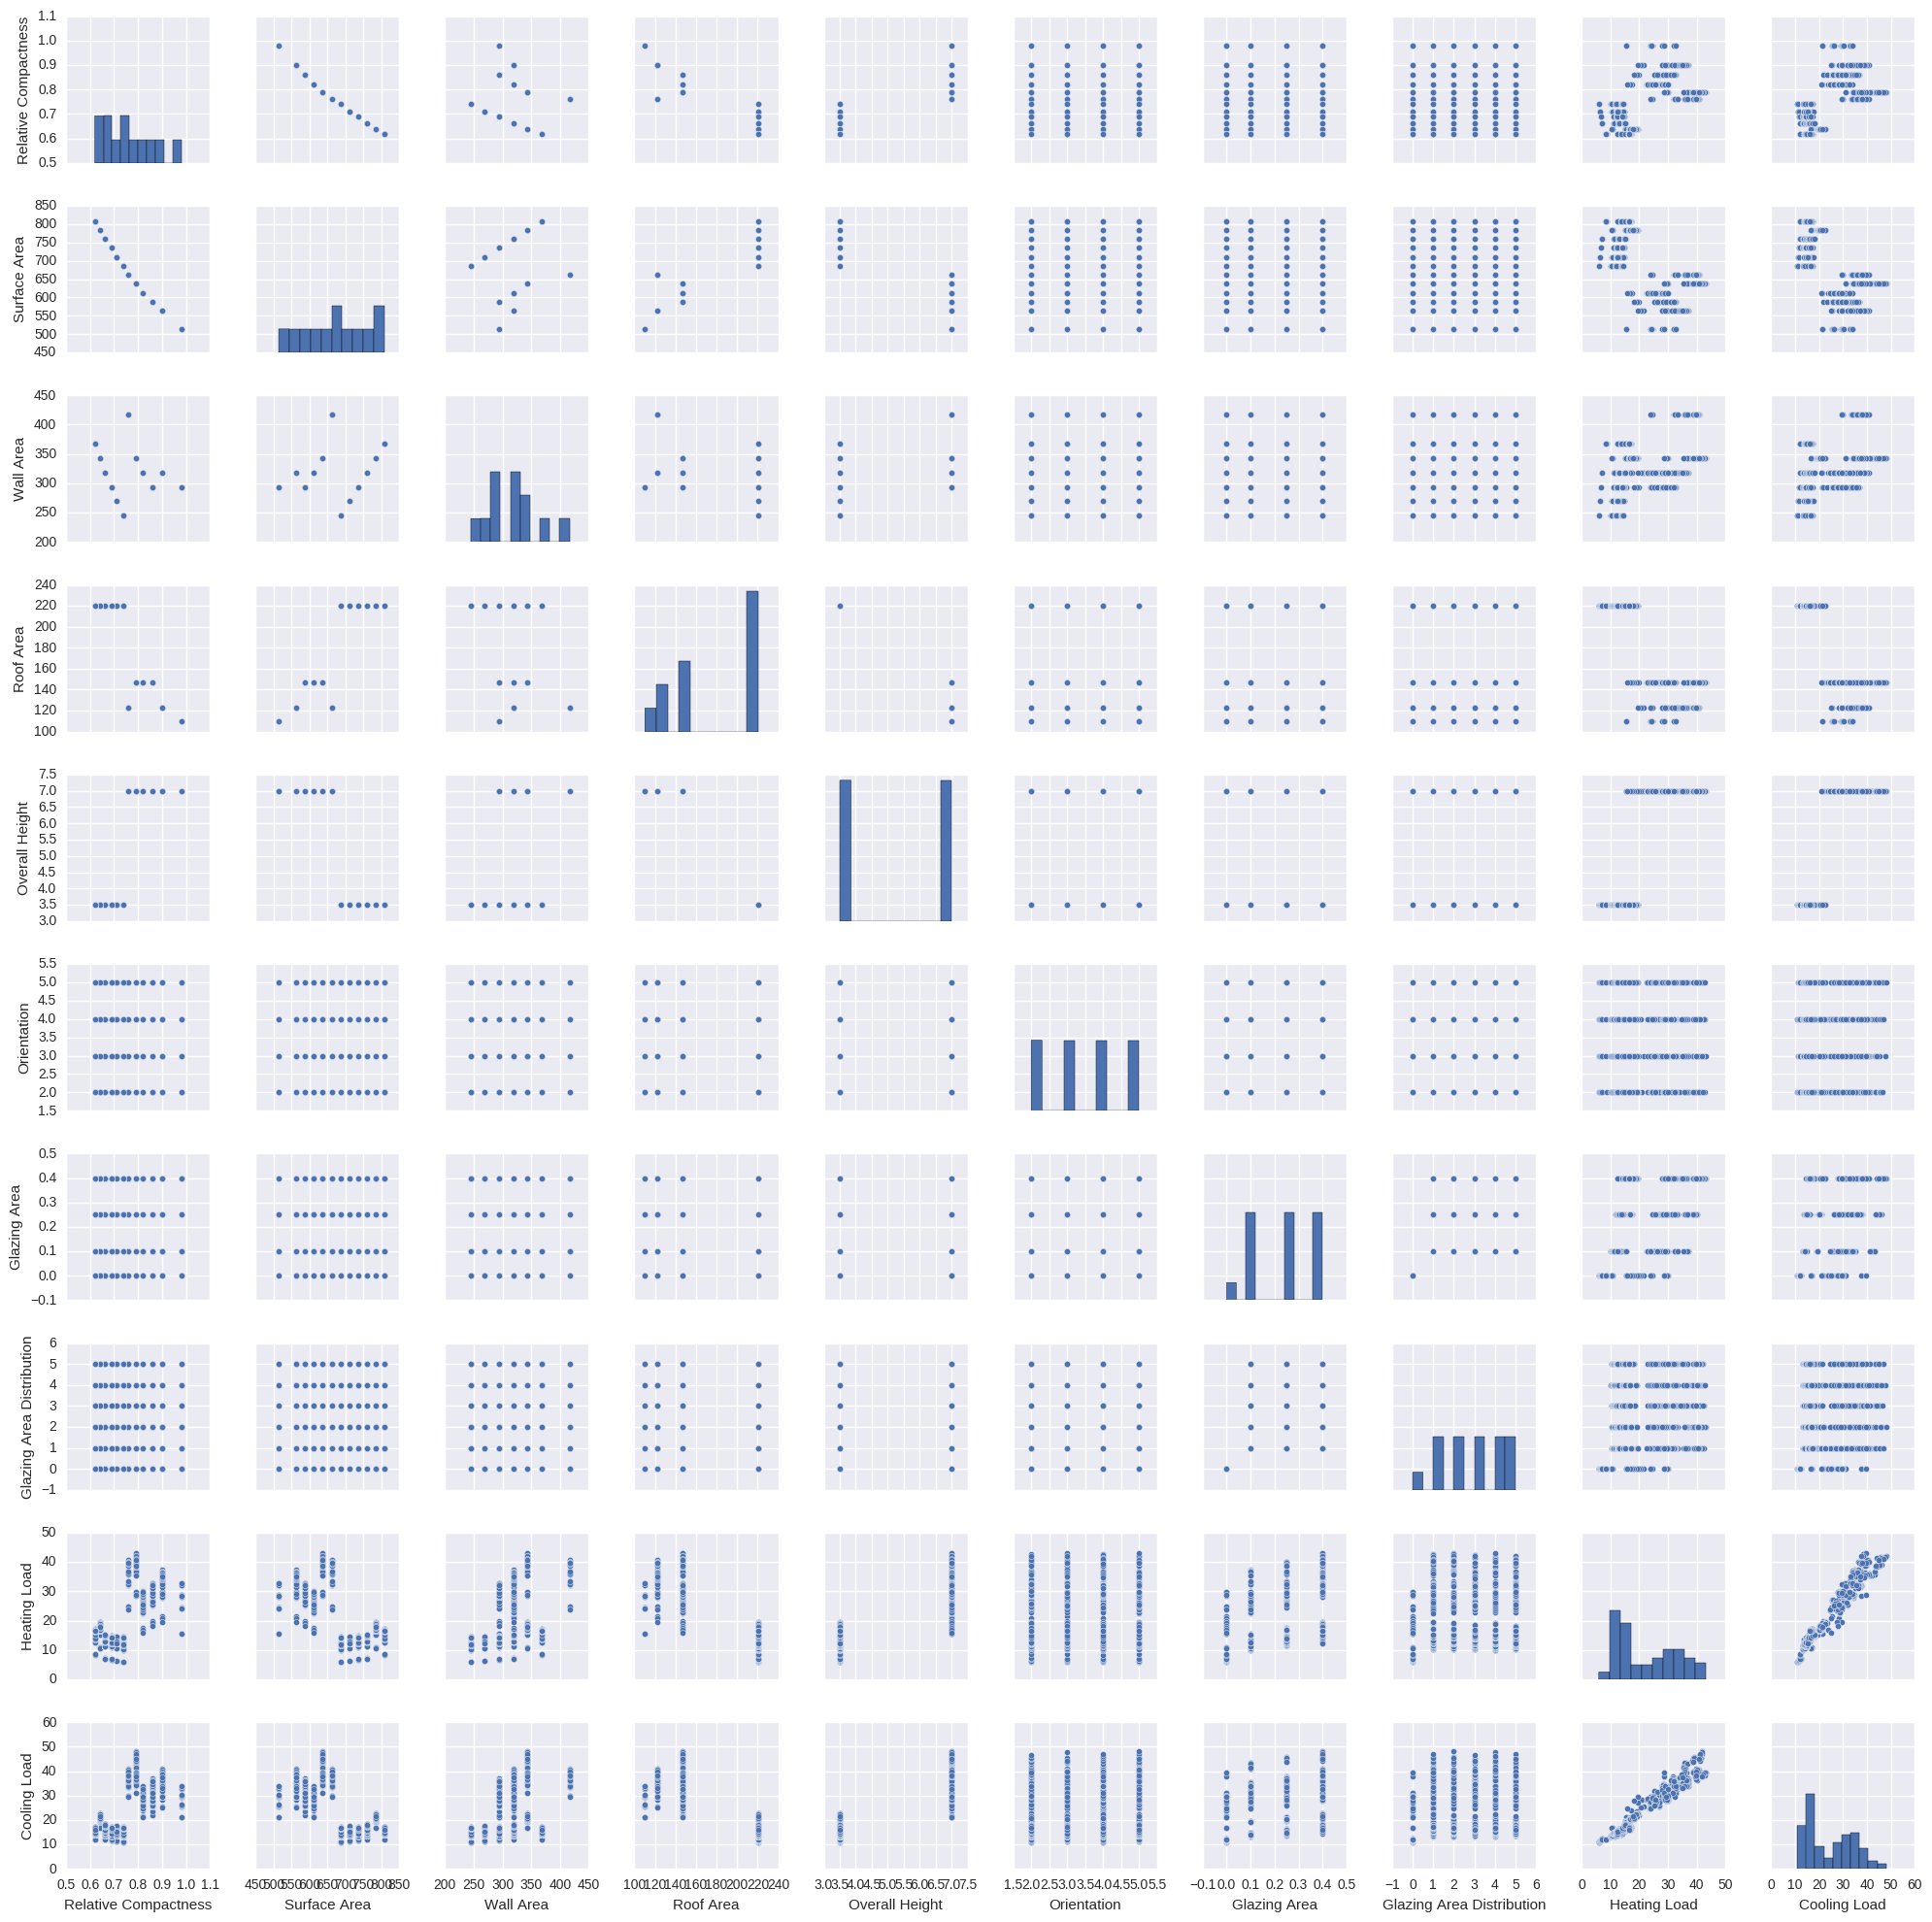

In [6]:
sns.pairplot(frame[num_cols],size=2)

In [6]:
import pandas as pd
vfi=pd.DataFrame()

In [7]:
frame.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
iv = frame.drop(['Heating Load'],axis=1)
dv = frame[['Heating Load']]

In [9]:
#==============================================================================
# split the dataset into training and test set. We will use 80/20 approach
#==============================================================================

from sklearn.model_selection import train_test_split
xtrain, xtest, y_train, y_test = train_test_split (iv, dv, test_size = 0.2, random_state = 145)


In [10]:
print(xtrain.shape)
print(xtest.shape)
print(y_train.shape)
print(y_test.shape)

(614, 9)
(154, 9)
(614, 1)
(154, 1)


In [11]:
xtrain.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
39,0.66,759.5,318.5,220.5,3.5,5,0.00,0,12.14
312,0.74,686.0,245.0,220.5,3.5,2,0.25,1,15.19
633,0.86,588.0,294.0,147.0,7.0,3,0.40,3,34.70
551,0.76,661.5,416.5,122.5,7.0,5,0.40,1,39.48
392,0.86,588.0,294.0,147.0,7.0,2,0.25,3,33.52


In [12]:
# Feature scaling is to bring all the independent variables in a dataset into
# same scale, to avoid any variable dominating  the model. Here we will not 
# transform the dependent variables.
#==============================================================================

from sklearn.preprocessing import StandardScaler
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (xtrain) #fit and transform
X_test = independent_scalar.transform (xtest) # only transform
print(X_train)

[[-0.96002623  0.96637925 -0.00464029 ..., -1.74288825 -1.77197416
  -1.29108749]
 [-0.20503922  0.13689622 -1.71412157 ...,  0.12210545 -1.13868421
  -0.96682825]
 [ 0.92744129 -0.96908115 -0.57446738 ...,  1.24110167  0.12789569
   1.10736772]
 ..., 
 [-0.96002623  0.96637925 -0.00464029 ...,  0.12210545  0.76118564
  -0.86264004]
 [-1.14877298  1.24287359  0.56518681 ...,  1.24110167 -0.50539426
  -0.23325818]
 [-0.96002623  0.96637925 -0.00464029 ..., -1.74288825 -1.77197416
  -1.28151919]]


In [13]:
lin = LinearRegression(n_jobs = -1)

In [14]:
lin.fit(X_train, y_train)
predictions = lin.predict(X_test)

In [15]:
kin = iv.copy()
kin.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,28.28


In [16]:
kin.columns[2:5]

Index(['Wall Area', 'Roof Area', 'Overall Height'], dtype='object')

In [22]:
lin.coef_

array([[-1.11537149, -0.70941688,  0.67946293, -1.02615825,  1.74322614,
        -0.12211169,  1.160978  ,  0.2924266 ,  7.02455268]])

In [23]:
lin.coef_.ravel()

array([-1.11537149, -0.70941688,  0.67946293, -1.02615825,  1.74322614,
       -0.12211169,  1.160978  ,  0.2924266 ,  7.02455268])

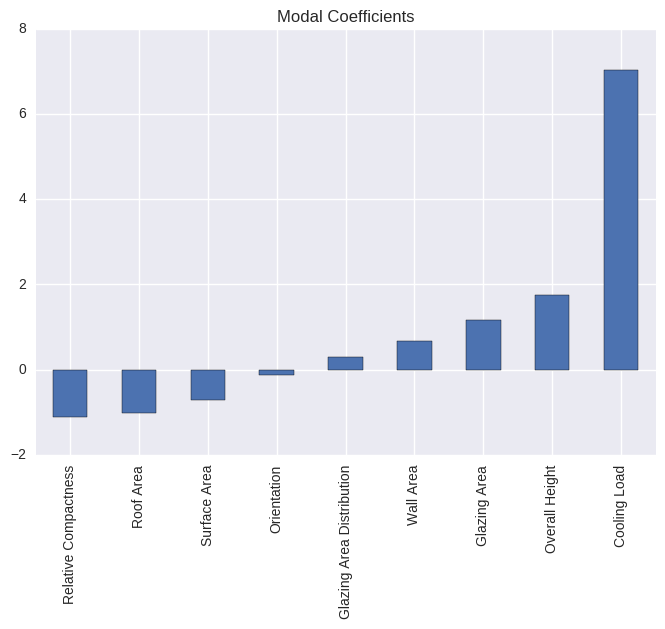

In [24]:
# checking the magnitude of coefficients
predictors = kin.columns
coef = pd.Series(lin.coef_.ravel(),predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')